In [2]:
##########################
# 任务一
##########################
import math
import matplotlib.pyplot as plt
class CSRMatrix:
    def __init__(self, n):
        # val数组存储非零元素
        val = []
        # col_ind数组存储列索引
        col_ind = []
        # row_ptr数组存储行指针
        row_ptr = [0]  # 第一个元素总是0

        for i in range(n):
            # 主对角线元素
            val.append(2 * n)
            col_ind.append(i)
            
            if i > 0:  # 上对角线元素
                val.append(-1 * n)
                col_ind.append(i - 1)
            
            if i < n - 1:  # 下对角线元素
                val.append(-1 * n)
                col_ind.append(i + 1)
            
            # 更新行指针
            row_ptr.append(len(val))

        # 由于Python索引从0开始，而CSR格式索引从1开始，因此对索引进行+1操作
        self.val = val
        self.col_ind = [x + 1 for x in col_ind]  # 列索引从1开始
        self.row_ptr = [x + 1 for x in row_ptr]  # 行指针从1开始

    def __str__(self):
        return f"CSR Matrix: {{'val': {self.val} \n 'col_ind': {self.col_ind} \n 'row_ptr': {self.row_ptr}}}"

# 创建CSR矩阵实例
csr_matrix_1 = CSRMatrix(5)
# 打印存储后的矩阵
print(csr_matrix_1)
print(csr_matrix_1.val[csr_matrix_1.row_ptr[1]])


CSR Matrix: {'val': [10, -5, 10, -5, -5, 10, -5, -5, 10, -5, -5, 10, -5] 
 'col_ind': [1, 2, 2, 1, 3, 3, 2, 4, 4, 3, 5, 5, 4] 
 'row_ptr': [1, 3, 6, 9, 12, 14]}
-5


In [4]:
##########################
# 任务二
##########################

# 矩阵向量乘法
def csr_vmult(A, b):
    n = len(b)
    result = [0] * n
    for i in range(n):
        for j in range(A.row_ptr[i], A.row_ptr[i + 1]):
            result[i] += A.val[j - 1] * b[A.col_ind[j - 1] - 1]
    return result

# 创建向量b
n = 16
b_2 = [1/n] * n
# 计算矩阵与向量的乘积
csr_matrix_2 = CSRMatrix(n)
result_2 = csr_vmult(csr_matrix_2, b_2)
print("Result of matrix-vector multiplication:\n", result_2)

Result of matrix-vector multiplication:
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [6]:
##########################
# 任务三
##########################

# Jacobi
def csr_jacobi_iteration(A, b, src):
    n = len(b)
    dst = [0] * n  # 初始化结果向量
    for i in range(n):
        # 计算第i个分量的值，不包括对角线元素，因为对角线元素用于求解
        dst[i] = (b[i] - sum(A.val[j - 1] * src[A.col_ind[j - 1] - 1] for j in range(A.row_ptr[i], A.row_ptr[i + 1]) if A.col_ind[j - 1] - 1 != i)) / A.val[A.row_ptr[i] - 1]
    return dst

# 创建向量b和初始迭代向量src
n = 16
b_3 = [1/n]*n
src = [0]*n  # 初始迭代向量
csr_matrix_3 = CSRMatrix(n)
# 执行一次Jacobi迭代
result_3_jacobi = csr_jacobi_iteration(csr_matrix_3, b_3, src)
result_3_jacobi

[0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125,
 0.001953125]

In [9]:
##########################
# 任务四
##########################

#gs
def csr_gs_iteration(A, b, src):
    n = len(b)
    dst = src[:]  # 从src复制初始值，避免溢出问题
    for i in range(n):
        row_start = A.row_ptr[i] - 1
        row_end = A.row_ptr[i + 1] - 1
        sum_ax = b[i]
        
        for j in range(row_start, row_end):
            col = A.col_ind[j] - 1
            if col != i:
                sum_ax -= A.val[j] * dst[col]
        
        # 更新 dst[i]，避免在计算过程中未完全更新的元素导致累积误差
        dst[i] = sum_ax / A.val[row_start]
    return dst

n = 16
b_4 = [1/n]*n
src = [0]*n  # 初始迭代向量
csr_matrix_4 = CSRMatrix(16)
result_3_gs = csr_gs_iteration(csr_matrix_4, b_4, src)
result_3_gs

[0.001953125,
 0.0029296875,
 0.00341796875,
 0.003662109375,
 0.0037841796875,
 0.00384521484375,
 0.003875732421875,
 0.0038909912109375,
 0.00389862060546875,
 0.003902435302734375,
 0.0039043426513671875,
 0.0039052963256835938,
 0.003905773162841797,
 0.0039060115814208984,
 0.0039061307907104492,
 0.0039061903953552246]

Iteration stops at step 198.


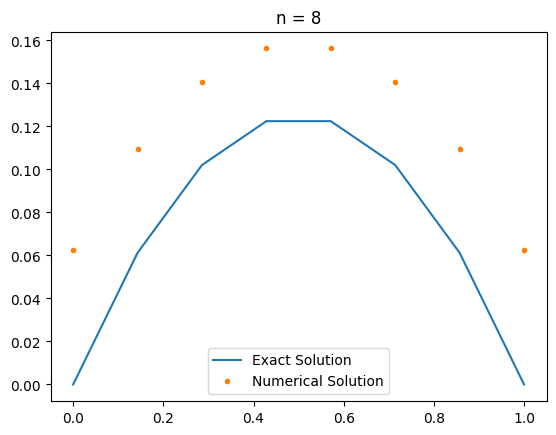

Iteration stops at step 653.


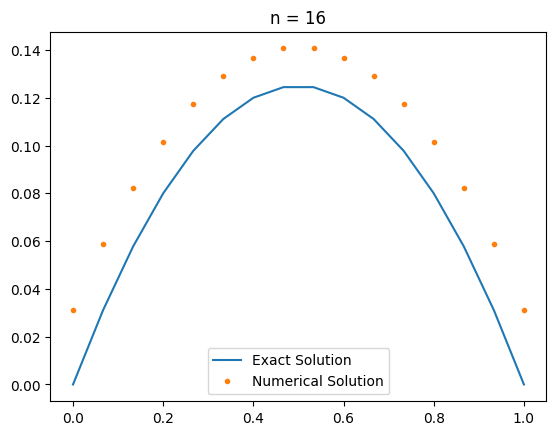

Iteration stops at step 2235.


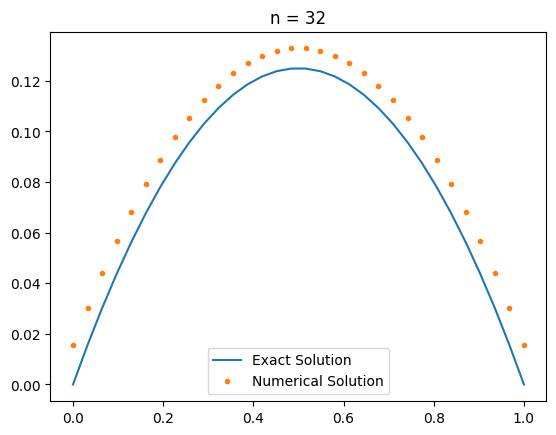

Iteration stops at step 7780.


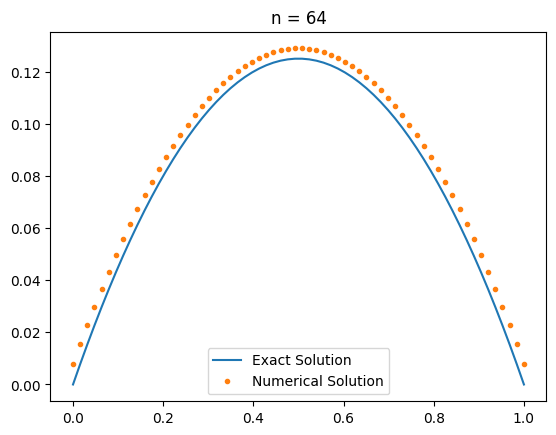

Iteration stops at step 27130.


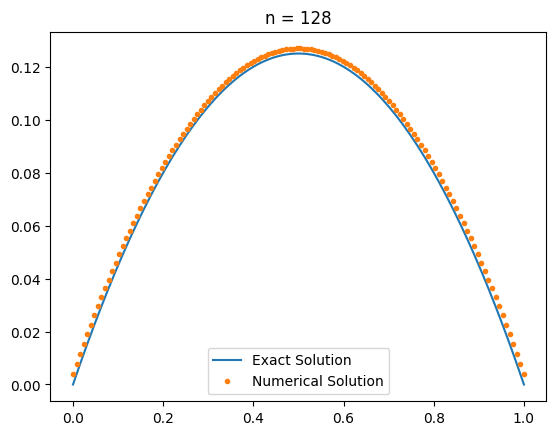

In [10]:
#########################
# 任务五
#########################
def l2_norm(x, y):
    return math.sqrt(sum((x_i - y_i) ** 2 for x_i, y_i in zip(x, y)))

# jacobi求解器
def jacobi_solver(A, b, x0, max_iteration, tol):
    x = x0[:]
    for k in range(1, max_iteration + 1):
        p = csr_jacobi_iteration(A, b, x)
        if l2_norm(x, p) < tol:
            print(f'Iteration stops at step {k}.')
            x = p
            return x  # Return the solution when convergence is reached
        x = p
    print('Max iteration step reached.')
    return x  # Return the last solution even if convergence was not reached
# 解析解函数
def exact_solution(x):
    return -0.5 * x**2 + 0.5 * x

# Jacobi
n_values = [8, 16, 32, 64, 128]
results = []
for n in n_values:
    csr_matrix_5= CSRMatrix(n)
    # csr_matrix_5.val = csr_matrix_5.val  * n
    # print(csr_matrix_5.val)
    b = [1/n] * n
    x0 = [0] * n
    max_iteration = 1000000
    tol = 1e-7
    solution = jacobi_solver(csr_matrix_5, b, x0, max_iteration, tol)
    # 生成图像
    x = [i / (n - 1) for i in range(n)]
    y = [exact_solution(xi) for xi in x]
    y_num = [solution[i] for i in range(n)]
    
    plt.plot(x, y, label='Exact Solution')
    plt.plot(x, y_num, '.', label='Numerical Solution')
    plt.title(f'n = {n}')
    plt.legend()
    plt.show()
for n, count in results:
    print(f"n = {n}, Iteration count = {count}")

Iteration stops at step 106.


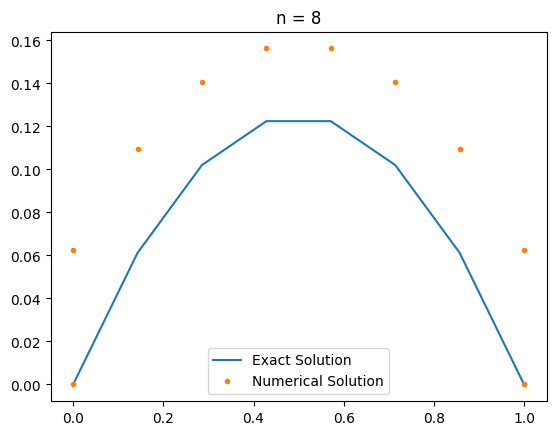

Iteration stops at step 348.


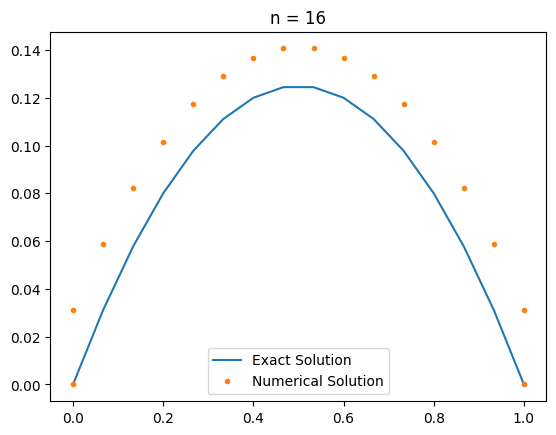

Iteration stops at step 1195.


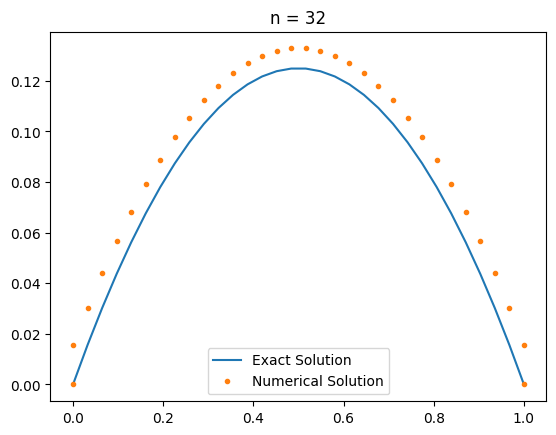

Iteration stops at step 4188.


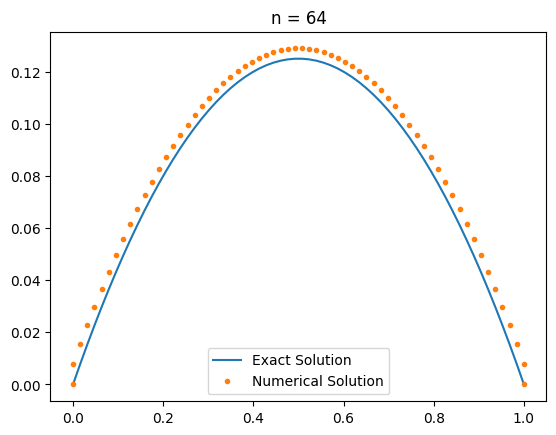

Iteration stops at step 14735.


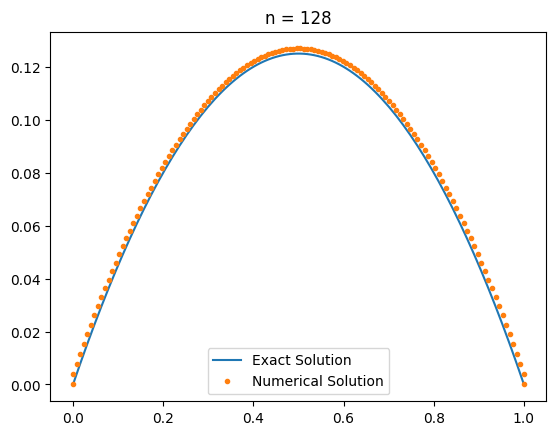

In [11]:

#########################
# 任务六
#########################
# gs求解器
def gs_solver(A, b, x0, max_iteration, tol):
    x = x0[:]
    for k in range(max_iteration):
        p = csr_gs_iteration(A, b, x)
        if math.sqrt(sum((x_i - p_i) ** 2 for x_i, p_i in zip(x, p))) < tol:  # L2范数
            print(f'Iteration stops at step {k + 1}.')
            return p
        x = p
    print('Max iteration step reached.')
    return x

# gs 测试脚本
n_values = [8, 16, 32, 64, 128]
results = []
for n in n_values:
    csr_matrix_5= CSRMatrix(n)
    b = [1/n] * n
    x0 = [0] * n
    max_iteration = 1000000  # 减少迭代次数以避免无限循环
    tol = 1e-7
    solution = gs_solver(csr_matrix_5, b, x0, max_iteration, tol)
    # 生成图像
    x = [i / (n - 1) for i in range(n)]
    y = [exact_solution(xi) for xi in x]
    y_num = [solution[i] for i in range(n)]
    
    plt.plot([0] + x + [1], [0] + y + [0], label='Exact Solution')  # 加入边界条件
    plt.plot([0] + x + [1], [0] + y_num + [0], '.', label='Numerical Solution')  # 加入边界条件
    # plt.plot(x, y, label='Exact Solution')
    # plt.plot(x, y_num, '.', label='Numerical Solution')
    plt.title(f'n = {n}')
    plt.legend()
    plt.show()
for n, count in results:
    print(f"n = {n}, Iteration count = {count}")

Gradient descent stops at step 219.


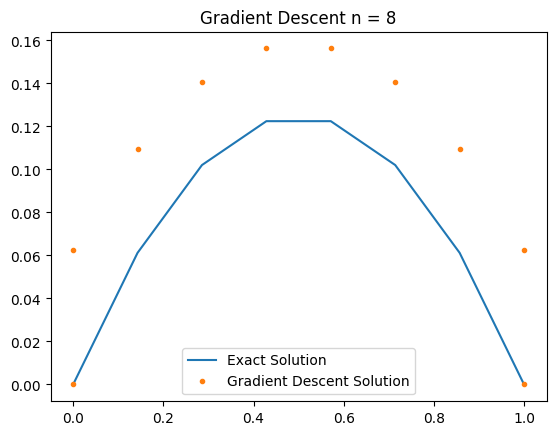

Gradient descent stops at step 839.


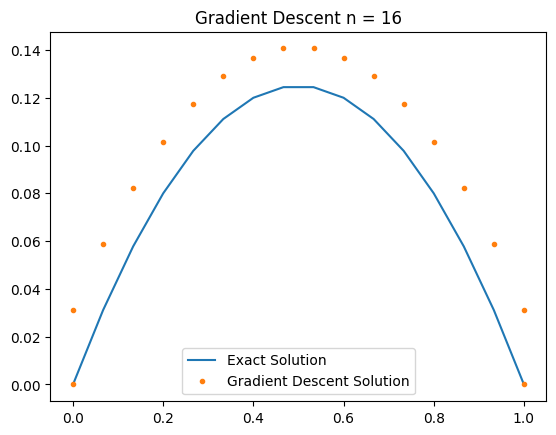

Gradient descent stops at step 3173.


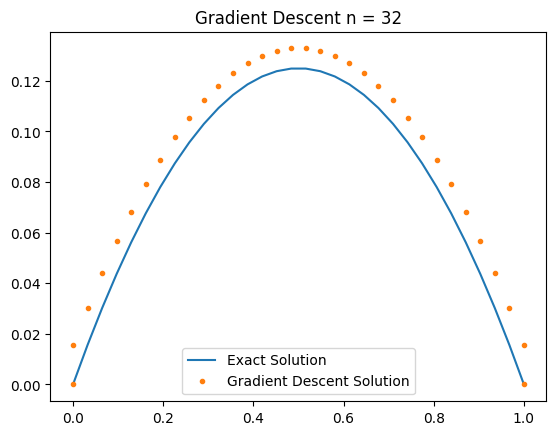

Gradient descent stops at step 12143.


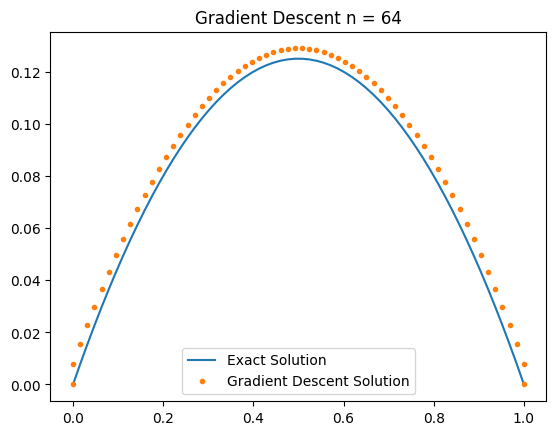

Gradient descent stops at step 46843.


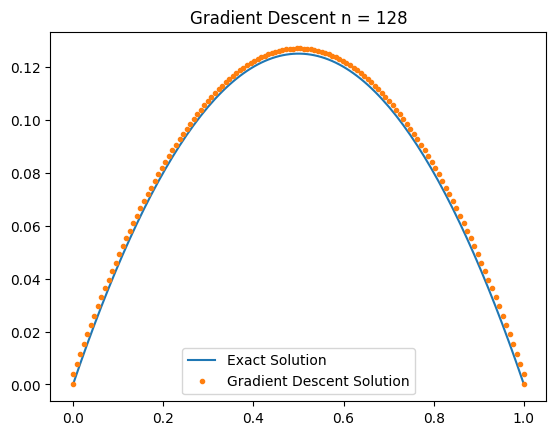

In [12]:
##########################
# 任务7
##########################
def gradient_descent_solver(A, b, x0, max_iteration, tol):
    x = x0[:]
    for k in range(max_iteration):
        # 计算残差 r = b - A * x
        Ax = csr_vmult(A, x)
        r = [b_i - Ax_i for b_i, Ax_i in zip(b, Ax)]
        
        # 计算残差的L2范数作为收敛判断
        norm_r = l2_norm(r, [0] * len(r))
        if norm_r < tol:
            print(f'Gradient descent stops at step {k + 1}.')
            return x

        # 计算步长 alpha = (r^T * r) / (r^T * A * r)
        Ar = csr_vmult(A, r)
        numerator = sum(r_i * r_i for r_i in r)
        denominator = sum(r_i * Ar_i for r_i, Ar_i in zip(r, Ar))
        
        # 避免 denominator 为 0 的情况
        if denominator == 0:
            print("Division by zero in step size calculation, stopping iteration.")
            return x
        
        alpha = numerator / denominator

        # 更新 x 向量
        x = [x_i + alpha * r_i for x_i, r_i in zip(x, r)]
        
    print('Max iteration step reached in gradient descent.')
    return x

n_values = [8, 16, 32, 64, 128]
results = []
#梯度下降法测试
for n in n_values:
    csr_matrix = CSRMatrix(n)
    b = [1 / n] * n
    x0 = [0] * n
    max_iteration = 1000000
    tol = 1e-7
    solution_gd = gradient_descent_solver(csr_matrix, b, x0, max_iteration, tol)
    
    # 绘制梯度下降法解的图像
    x = [i / (n - 1) for i in range(n)]
    y = [exact_solution(xi) for xi in x]
    y_num = solution_gd
    plt.plot([0] + x + [1], [0] + y + [0], label='Exact Solution')
    plt.plot([0] + x + [1], [0] + y_num + [0], '.', label='Gradient Descent Solution')
    plt.title(f'Gradient Descent n = {n}')
    plt.legend()
    plt.show()


Conjugate gradient stops at step 5.


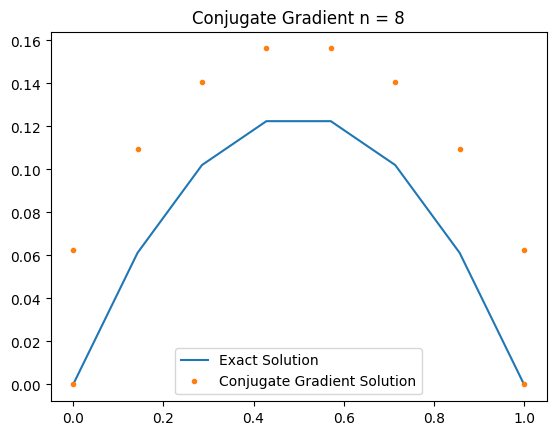

Conjugate gradient stops at step 9.


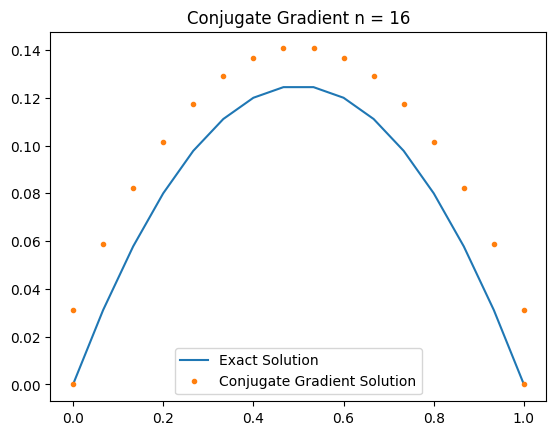

Conjugate gradient stops at step 17.


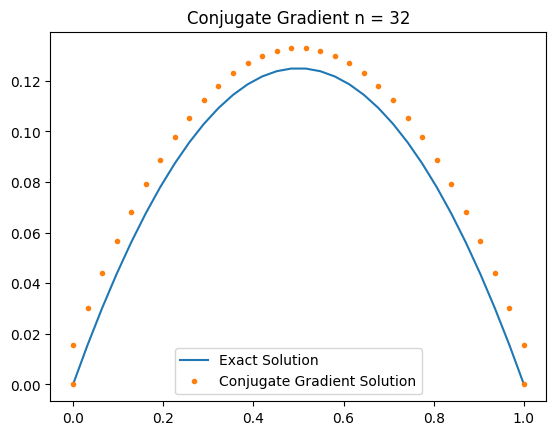

Conjugate gradient stops at step 33.


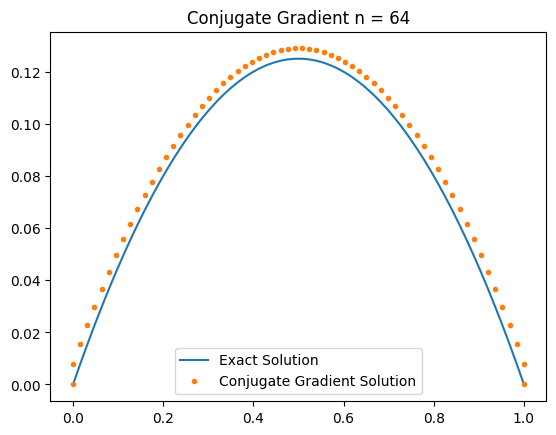

Conjugate gradient stops at step 65.


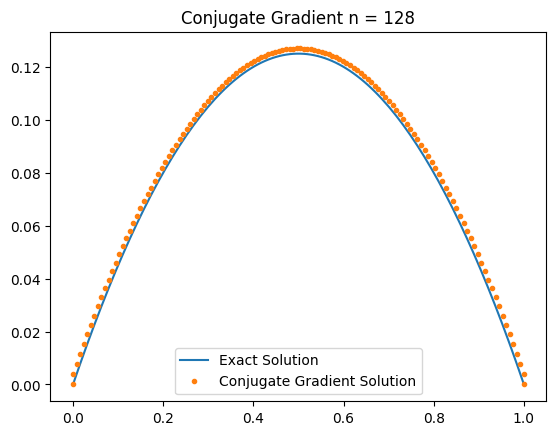

In [13]:
def conjugate_gradient_solver(A, b, x0, max_iteration, tol):
    x = x0[:]
    r = [b_i - sum(A.val[j - 1] * x[A.col_ind[j - 1] - 1] for j in range(A.row_ptr[i] - 1, A.row_ptr[i + 1] - 1)) for i, b_i in enumerate(b)]
    p = r[:]
    for k in range(max_iteration):
        norm_r = l2_norm(r, [0] * len(r))
        if norm_r < tol:
            print(f'Conjugate gradient stops at step {k + 1}.')
            return x
        Ap = csr_vmult(A, p)
        alpha = sum(r_i**2 for r_i in r) / sum(p_i * Ap_i for p_i, Ap_i in zip(p, Ap))
        x = [x_i + alpha * p_i for x_i, p_i in zip(x, p)]
        r_next = [r_i - alpha * Ap_i for r_i, Ap_i in zip(r, Ap)]
        beta = sum(r_next_i**2 for r_next_i in r_next) / sum(r_i**2 for r_i in r)
        p = [r_next_i + beta * p_i for r_next_i, p_i in zip(r_next, p)]
        r = r_next
    print('Max iteration step reached in conjugate gradient.')
    return x

n_values = [8, 16, 32, 64, 128]
results = []
#共轭梯度法测试
for n in n_values:
    csr_matrix = CSRMatrix(n)
    b = [1 / n] * n
    x0 = [0] * n
    max_iteration = 1000000
    tol = 1e-7
    solution_cg = conjugate_gradient_solver(csr_matrix, b, x0, max_iteration, tol)
    # 绘制共轭梯度法解的图像
    x = [i / (n - 1) for i in range(n)]
    y = [exact_solution(xi) for xi in x]
    y_num = solution_cg
    plt.plot([0] + x + [1], [0] + y + [0], label='Exact Solution')
    plt.plot([0] + x + [1], [0] + y_num + [0], '.', label='Conjugate Gradient Solution')
    plt.title(f'Conjugate Gradient n = {n}')
    plt.legend()
    plt.show()